# LinearRegerssion Assignment

#### Tasks to be performed:
    1. Load the dataset using pandas
    2. Extract data fromYearsExperience column is a variable named X
    3. Extract data from salary column is a variable named Y
    4. Divide the dataset into two parts for training and testing in 66% and 33% proportion
    5. Create and train LinearRegression Model on training set
    6. Make predictions based on the testing set using the trained model
    7. Check the performance by calculating the r2 score of the model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('data.csv')

In [3]:
data.shape

(30, 2)

In [4]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
x=data['YearsExperience']
x

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64

In [6]:
y=data['Salary']
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [7]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1c51d9fd730>,
 'caps': [<matplotlib.lines.Line2D at 0x1c51d9fdc70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c51d9fd490>,
 'medians': [<matplotlib.lines.Line2D at 0x1c51da1b1f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c51da1b490>,
 'means': []}

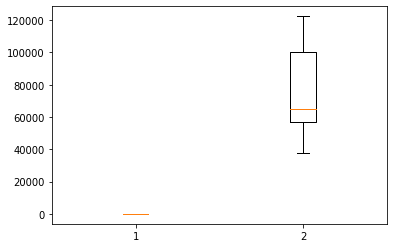

In [8]:
plt.boxplot(data)

In [9]:
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import LinearRegression

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
col=list(data.columns)

In [12]:
col

['YearsExperience', 'Salary']

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in data.columns:
    if((data[col].dtypes!='object')&(col != 'charges')):
        col_list.append(col)
        
x=data[col_list]
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i )for i in range (len(x.columns))]
print(vif_data)

           feature        VIF
0  YearsExperience  37.145972
1           Salary  37.145972


In [14]:
a=data[col_list]
a

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [15]:
X=data['YearsExperience']
Y=data['Salary']

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.75,random_state=0)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(22,)
(8,)
(22,)
(8,)


In [18]:
X_train

17     5.3
22     7.9
5      2.9
16     5.1
8      3.2
14     4.5
23     8.2
20     6.8
1      1.3
29    10.5
6      3.0
4      2.2
18     5.9
19     6.0
9      3.7
7      3.2
25     9.0
3      2.0
0      1.1
21     7.1
15     4.9
12     4.0
Name: YearsExperience, dtype: float64

In [19]:
X_train = X_train.values.reshape(-1, 1)

In [20]:
l_model=LinearRegression()

In [21]:
l_model.fit(X_train,Y_train)

LinearRegression()

In [22]:
prediction=l_model.predict(X_test.values.reshape(-1, 1))

In [23]:
prediction

array([ 41056.25705466, 123597.70938378,  65443.50433372,  63567.56223533,
       116093.94099022, 108590.17259667, 117031.91203942,  64505.53328452])

In [24]:
prediction.dtype

dtype('float64')

In [25]:
error_pred=pd.DataFrame(columns={'Prediction_data','Actual_data'})

In [26]:

error_pred['Actual_data']=Y_test

In [27]:
error_pred['Prediction_data']=prediction

In [28]:
error_pred

,Actual_data,Prediction_data
2,37731.0,41056.257055
28,122391.0,123597.709384
13,57081.0,65443.504334
10,63218.0,63567.562235
26,116969.0,116093.940990
24,109431.0,108590.172597
27,112635.0,117031.912039
11,55794.0,64505.533285


In [29]:
error_pred['Error']=error_pred['Actual_data']-error_pred['Prediction_data']
error_pred

,Actual_data,Prediction_data,Error
2,37731.0,41056.257055,-3325.257055
28,122391.0,123597.709384,-1206.709384
13,57081.0,65443.504334,-8362.504334
10,63218.0,63567.562235,-349.562235
26,116969.0,116093.940990,875.059010
24,109431.0,108590.172597,840.827403
27,112635.0,117031.912039,-4396.912039
11,55794.0,64505.533285,-8711.533285


In [30]:
from sklearn.metrics import *
r2_on_test=r2_score(Y_test, prediction)
r2_on_test

0.9779208335417602

## Logistic Regression Assignment


#### Problem Statement:
    You work in XYZ Company as a Python Data Scientist. The company officials have collected some data on 
    Health parameter based on Diabetes and wish for you to create a model from it. 
###### Dataset: diabetes.csv 
##### Tasks to be performed: 
    1. Load the dataset using pandas 
    2. Extract data fromOutcome column is a variable named Y 
    3. Extract data from every column except Outcome column in a variable named X 
    4. Divide the dataset into two parts for training and testing in 70% and 30% proportion 
    5. Create and train Logistic Regression Model on training set 
    6. Make predictions based on the testing set using the trained model 
    7. Check the performance by calculating the confusion matrix and accuracy score of the model

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

##### 1. Load the dataset using pandas

In [32]:
log=pd.read_csv('diabetes.csv')

In [33]:
log.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
log.shape

(768, 9)

In [35]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [36]:
log.Glucose.unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190], dtype=int64)

In [37]:
len(log.Glucose.unique())

136

In [38]:
log.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [39]:
log.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [40]:
col=list(log.columns)

In [41]:
col

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [42]:
for i in col:
    s=len(log[i].unique())
    print(s)

17
136
47
51
186
248
517
52
2


<AxesSubplot: xlabel='Pregnancies'>

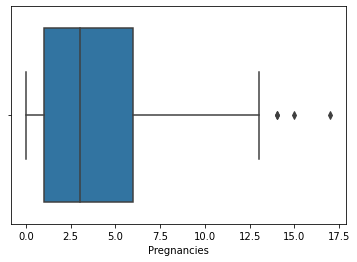

In [43]:
import seaborn as sns
sns.boxplot(x=log['Pregnancies'])

<AxesSubplot: xlabel='Glucose'>

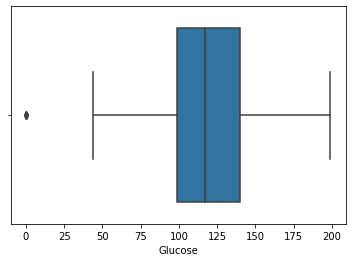

In [44]:
import seaborn as sns
sns.boxplot(x=log['Glucose'])

In [45]:
Q1 = log.quantile(0.25)
Q3 = log.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       1.0000
dtype: float64


In [46]:
log = log[~((log < (Q1 - 1.5 * IQR)) |(log > (Q3 + 1.5 * IQR))).any(axis=1)]

In [47]:
log.shape

(639, 9)

In [48]:
log.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
10,4,110,92,0,0,37.6,0.191,30,0
11,10,168,74,0,0,38.0,0.537,34,1
14,5,166,72,19,175,25.8,0.587,51,1
16,0,118,84,47,230,45.8,0.551,31,1


<AxesSubplot: xlabel='Glucose'>

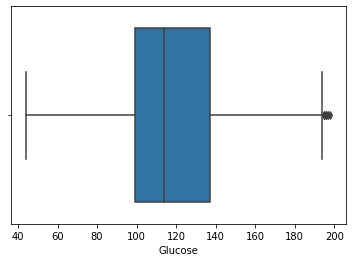

In [49]:
sns.boxplot(x=log['Glucose'])

<AxesSubplot: xlabel='Pregnancies'>

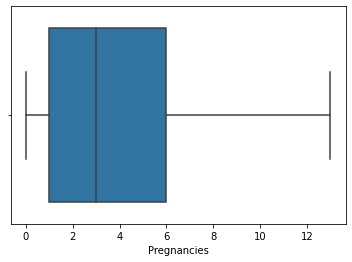

In [50]:
sns.boxplot(x=log['Pregnancies'])

In [51]:
col_list = list(log.columns)

In [52]:
col_list

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [53]:
col_list.remove('Outcome')

In [54]:
col_list

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [55]:
log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 639 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               639 non-null    int64  
 1   Glucose                   639 non-null    int64  
 2   BloodPressure             639 non-null    int64  
 3   SkinThickness             639 non-null    int64  
 4   Insulin                   639 non-null    int64  
 5   BMI                       639 non-null    float64
 6   DiabetesPedigreeFunction  639 non-null    float64
 7   Age                       639 non-null    int64  
 8   Outcome                   639 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 49.9 KB


In [56]:
log.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


In [57]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in col_list:
    log[i]=labelencoder.fit_transform(log[i])

In [58]:
log.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,85,18,28,0,120,320,29,1
1,1,22,15,22,0,59,178,10,0
2,8,118,13,0,0,28,336,11,1
3,1,26,15,16,58,74,50,0,0
5,5,53,19,0,0,50,73,9,0


In [59]:
log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 639 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Pregnancies               639 non-null    int64
 1   Glucose                   639 non-null    int64
 2   BloodPressure             639 non-null    int64
 3   SkinThickness             639 non-null    int64
 4   Insulin                   639 non-null    int64
 5   BMI                       639 non-null    int64
 6   DiabetesPedigreeFunction  639 non-null    int64
 7   Age                       639 non-null    int64
 8   Outcome                   639 non-null    int64
dtypes: int64(9)
memory usage: 49.9 KB


In [60]:
pd.options.display.float_format = '{:,.2f}'.format

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in log.columns:
    if ((log[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

In [62]:
col_list

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [63]:
X=log[col_list]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,85,18,28,0,120,320,29,1
1,1,22,15,22,0,59,178,10,0
2,8,118,13,0,0,28,336,11,1
3,1,26,15,16,58,74,50,0,0
5,5,53,19,0,0,50,73,9,0
...,...,...,...,...,...,...,...,...,...
763,10,38,21,41,103,115,52,42,0
764,2,59,17,20,0,151,170,6,0
765,5,58,18,16,67,55,102,9,0
766,1,63,10,0,0,92,177,26,1


In [64]:
for i in range(len(X.columns)):
    print(i)

0
1
2
3
4
5
6
7
8


In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in log.columns:
    if ((log[col].dtype != 'object') & (col != 'Outcome') ):
        col_list.append(col)

X = log[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_data

,feature,VIF
0,Pregnancies,3.38
1,Glucose,5.54
2,BloodPressure,7.51
3,SkinThickness,3.90
4,Insulin,2.51
5,BMI,6.68
6,DiabetesPedigreeFunction,3.36
7,Age,3.58


In [66]:
log=log.drop(['BloodPressure'],axis=1)

In [67]:
col_list = []
for col in log.columns:
    if ((log[col].dtype != 'object') & (col != 'Outcome') ):
        col_list.append(col)

X = log[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

                    feature  VIF
0               Pregnancies 3.33
1                   Glucose 4.87
2             SkinThickness 3.85
3                   Insulin 2.47
4                       BMI 5.71
5  DiabetesPedigreeFunction 3.25
6                       Age 3.40


In [68]:
vif_data.feature

0                 Pregnancies
1                     Glucose
2               SkinThickness
3                     Insulin
4                         BMI
5    DiabetesPedigreeFunction
6                         Age
Name: feature, dtype: object

In [69]:
Ind_Features = list(vif_data.feature)
Ind_Features

['Pregnancies',
 'Glucose',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [70]:
df_ind = log[Ind_Features]
df_ind

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,85,28,0,120,320,29
1,1,22,22,0,59,178,10
2,8,118,0,0,28,336,11
3,1,26,16,58,74,50,0
5,5,53,0,0,50,73,9
...,...,...,...,...,...,...,...
763,10,38,41,103,115,52,42
764,2,59,20,0,151,170,6
765,5,58,16,67,55,102,9
766,1,63,0,0,92,177,26


In [71]:
df_dep = log['Outcome']
df_dep

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 639, dtype: int64

In [72]:
df_ind.dtypes

Pregnancies                 int64
Glucose                     int64
SkinThickness               int64
Insulin                     int64
BMI                         int64
DiabetesPedigreeFunction    int64
Age                         int64
dtype: object

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_ind, df_dep, test_size=0.30, random_state=42)

In [74]:
x_train.head()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
689,1,81,39,103,215,166,25
479,4,69,24,0,73,221,42
307,0,74,7,86,42,28,0
636,5,41,0,0,81,36,27
36,11,75,0,0,117,222,14


In [75]:
x_train.shape

(447, 7)

In [76]:
x_test.shape

(192, 7)

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
logisticRegr = LogisticRegression()

In [79]:
logisticRegr.fit(x_train, y_train)

LogisticRegression()

In [80]:
test_pred = logisticRegr.predict(x_test)

In [81]:
test_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [82]:
x_test

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
108,3,20,24,3,127,167,4
431,3,26,9,51,95,291,17
690,8,44,0,0,40,396,13
260,3,125,8,78,99,143,13
755,1,65,32,66,149,425,16
...,...,...,...,...,...,...,...
752,3,45,17,0,53,86,4
350,4,29,0,0,192,96,8
105,1,63,22,88,80,379,0
561,0,131,25,136,188,265,7


In [83]:
test_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [84]:
pd.DataFrame(logisticRegr.predict_proba(x_test))

,0,1
0,0.92,0.08
1,0.91,0.09
2,0.78,0.22
3,0.22,0.78
4,0.51,0.49
...,...,...
187,0.92,0.08
188,0.82,0.18
189,0.76,0.24
190,0.09,0.91


In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [86]:
c1=confusion_matrix(y_test,test_pred)
c1

array([[125,   7],
       [ 31,  29]], dtype=int64)

In [87]:
sen=c1[0,0]/(c1[0,0]+c1[0,1])
sen

0.946969696969697

In [88]:
sep=c1[1,1]/(c1[1,1]+c1[1,0])
sep

0.48333333333333334

In [89]:
accuracy_score(y_test,test_pred)

0.8020833333333334

## DECISION TREE

### Problem Statement:
    You work in XYZ Company as a Python Data Scientist. The company officials have collected some data on salaries based on year of experience and wish for you to create a model from it. 
###### Dataset: diabetes.csv 
##### Tasks to be performed: 
    1. Load the dataset using pandas 
    2. Extract data fromOutcome column is a variable named Y 
    3. Extract data from every column except Outcome column in a variable named X
    4. Divide the dataset into two parts for training and testing in 70% and 30% proportion 
    5. Create and train Decision Tree Model on training set 
    6. Make predictions based on the testing set using the trained model 
    7. Check the performance by calculating the confusion matrix and accuracy score of the model 


In [90]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [91]:
data=pd.read_csv('diabetes-1.csv')

In [92]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [94]:
data.shape

(768, 9)

In [97]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [98]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [100]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [99]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [101]:
y=data['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [103]:
x=data.iloc[:,:-1]
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.60,0.63,50
1,1,85,66,29,0,26.60,0.35,31
2,8,183,64,0,0,23.30,0.67,32
3,1,89,66,23,94,28.10,0.17,21
4,0,137,40,35,168,43.10,2.29,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.90,0.17,63
764,2,122,70,27,0,36.80,0.34,27
765,5,121,72,23,112,26.20,0.24,30
766,1,126,60,0,0,30.10,0.35,47


In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=0)

In [112]:
print(x_train.shape)

(537, 8)


In [113]:
print(y_train.shape)

(537,)


In [114]:
cl=tree.DecisionTreeClassifier()
cl.fit(x_train,y_train)

DecisionTreeClassifier()

In [115]:
pred=cl.predict(x_test)

In [116]:
confusion_matrix(pred,y_test)

array([[126,  28],
       [ 31,  46]], dtype=int64)

In [117]:
accuracy_score(pred,y_test)

0.7445887445887446